## Travel Insurance Prediction

For this project, I will be training a machine learning model in order to predict whether or not a customer will purchase travel insurance. This is useful as airlines can use this model in order to accurately predict who will buy their travel insurance and then focus on advertising towards these demographics in order to maximize travel insurance churn.

This dataset was taken from a Kaggle dataset. Link can be found here: https://www.kaggle.com/datasets/tejashvi14/travel-insurance-prediction-data

### Import and Clean-up

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import warnings
from sklearn import tree, preprocessing
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("TravelInsurancePrediction.csv")

In [3]:
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [4]:
df.describe()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [5]:
pd.value_counts(df['FamilyMembers'])



4    505
5    426
3    377
6    294
7    178
2     93
8     59
9     55
Name: FamilyMembers, dtype: int64

In [6]:
#let's remove unnamed, Employment Type, let's make a low-income, mid-income, high-income column
df=df.drop(['Unnamed: 0'], axis = 1)

In [7]:
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [8]:

df['AnnualIncome'].min()

300000

Note: It is important to remember that the currency is in Rupees.

In [9]:
df['AnnualIncome'].describe(datetime_is_numeric = True).round()

count       1987.0
mean      932763.0
std       376856.0
min       300000.0
25%       600000.0
50%       900000.0
75%      1250000.0
max      1800000.0
Name: AnnualIncome, dtype: float64

Before we do some further data exploration, let's clean up our data a little bit.

In [10]:
df['FrequentFlyer'].replace(to_replace = ['No', 'Yes'], value = [0,1], inplace = True)
df['EverTravelledAbroad'].replace(to_replace = ['No', 'Yes'], value = [0,1], inplace = True)
df['GraduateOrNot'].replace(to_replace = ['No', 'Yes'], value = [0,1], inplace = True)
df.head(15)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,1,400000,6,1,0,0,0
1,31,Private Sector/Self Employed,1,1250000,7,0,0,0,0
2,34,Private Sector/Self Employed,1,500000,4,1,0,0,1
3,28,Private Sector/Self Employed,1,700000,3,1,0,0,0
4,28,Private Sector/Self Employed,1,700000,8,1,1,0,0
5,25,Private Sector/Self Employed,0,1150000,4,0,0,0,0
6,31,Government Sector,1,1300000,4,0,0,0,0
7,31,Private Sector/Self Employed,1,1350000,3,0,1,1,1
8,28,Private Sector/Self Employed,1,1450000,6,1,1,1,1
9,33,Government Sector,1,800000,3,0,1,0,0


In [11]:
df.isna().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [12]:
le = LabelEncoder()
# Assigning numerical values and storing in another column
df['Employment Type'] = le.fit_transform(df['Employment Type'])
df.head(10) #0 is Government Sector, 1 is Private Sector/Self Employed

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0
5,25,1,0,1150000,4,0,0,0,0
6,31,0,1,1300000,4,0,0,0,0
7,31,1,1,1350000,3,0,1,1,1
8,28,1,1,1450000,6,1,1,1,1
9,33,0,1,800000,3,0,1,0,0


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

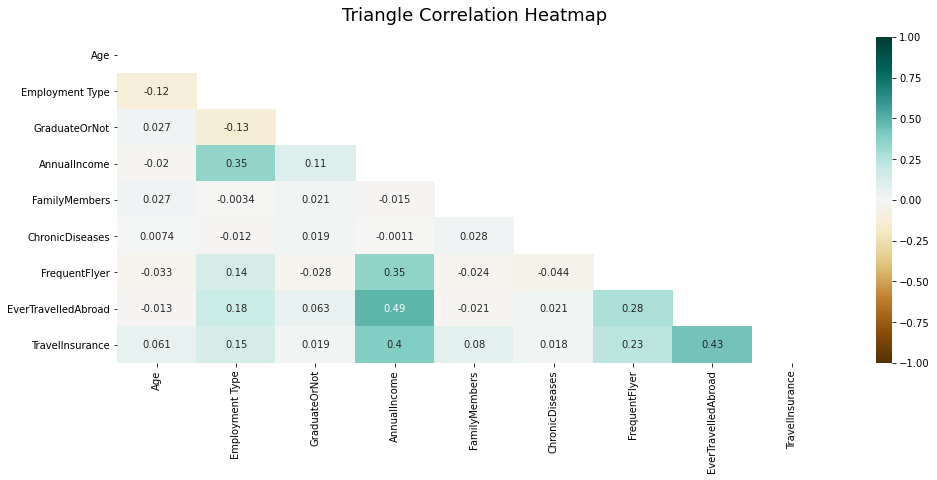

In [13]:

plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

Travel insurance is most strongly correlated with annual income and if the customer has ever travelled abroad before. This will be important to keep in mind later on.

Let's explore how annual income is distributed within this dataset

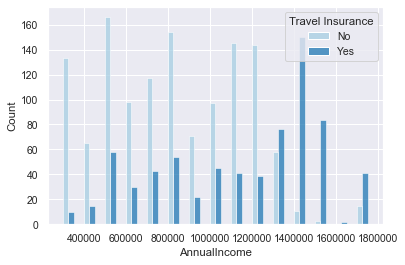

In [14]:

sns.set(font_scale = 0.95)
sns.set_palette("Paired")
fig, ax = plt.subplots()
ax.ticklabel_format(useOffset=False, style='plain')
a = sns.histplot(data=df, x="AnnualIncome", hue="TravelInsurance", multiple="dodge", shrink = 0.5)

new_title = 'Travel Insurance'
a.legend_.set_title(new_title)
# replace labels
new_labels = ['No', 'Yes']
for t, l in zip(a.legend_.texts, new_labels):
    t.set_text(l)

As we can see, generally, the higher the income the higher proportion of people holding travel insurance versus not holding travel insurance. However, in general, the annual incomes are very high. This could be because there are multiple "breadwinners" in the family, as well as a multitude of other reasons. Let's explore if these families with higher incomes tend to have more family members in them.

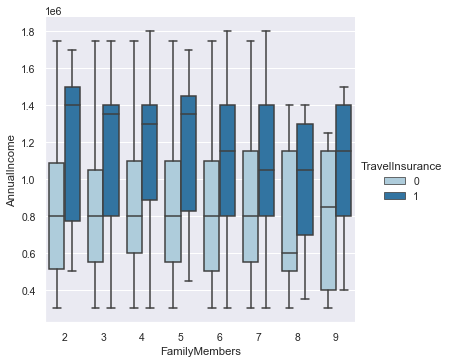

In [15]:
sns.catplot(data=df, x="FamilyMembers", y="AnnualIncome", hue="TravelInsurance", kind = 'box')



This boxplot depicts the relationship between family members, annual income, and travel insurance. Across all family sizes, those who hold travel insurance tend to have higher median incomes showing us that there is a relationship between income and travel insurance.

## Training the model

In [16]:
X = df.drop(['TravelInsurance'], axis = 1)
y = df['TravelInsurance']
np.random.seed(1234)
trainX, testX, trainy, testy = train_test_split(X,y, test_size = 0.2) # hold out 20% of the data
print(X.columns)

Index(['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad'],
      dtype='object')


### Feature Selection and testing out different models

In [17]:
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model)
fit = rfe.fit(X, y)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 4
Selected Features: [ True False  True  True  True False False False]
Feature Ranking: [1 3 1 1 1 5 4 2]


In [18]:
print(X.columns)

Index(['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad'],
      dtype='object')


In [19]:
sel_cols = SelectKBest(mutual_info_classif, k=4)
sel_cols.fit(trainX, trainy)
trainX.columns[sel_cols.get_support()]

Index(['Age', 'AnnualIncome', 'FrequentFlyer', 'EverTravelledAbroad'], dtype='object')

In [20]:
cols = [ 'Age','GraduateOrNot','AnnualIncome','EverTravelledAbroad','FamilyMembers']

LR = LogisticRegression(max_iter = 1000)
print(cross_val_score(LR, trainX[cols], trainy, cv = 10).mean()) 

0.6362510946580686


In [21]:
X = df[cols].to_numpy()
y= df['TravelInsurance'].to_numpy()
trainX, testX, trainy, testy = train_test_split(X,y, test_size = 0.2)

LR = LogisticRegression(max_iter = 1000)
print(cross_val_score(LR, trainX, trainy, cv = 10).mean()) 

0.6368800254756788


In [22]:
from sklearn.model_selection import cross_val_score
from sklearn import tree

# make a model
T = tree.DecisionTreeClassifier(max_depth = 3)

# 10-fold cross validation: hold out 10%, train on the 90%, repeat 10 times. 
cv_scores = cross_val_score(T, trainX, trainy, cv=10)
cv_scores

array([0.8490566 , 0.86792453, 0.79245283, 0.86163522, 0.83647799,
       0.81761006, 0.8490566 , 0.81132075, 0.81132075, 0.82911392])

In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                ['scaler', MinMaxScaler()],
                                ['classifier', LogisticRegression(random_state=11,
                                                                  max_iter=1000)]])

stratified_kfold = StratifiedKFold(n_splits=4,
                                       shuffle=True,
                                       random_state=11)
    
param_grid = {'classifier__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           n_jobs=-1)

grid_search.fit(trainX, trainy)
cv_score = grid_search.best_score_
test_score = grid_search.score(testX, testy)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')
print('LR Accuracy: {:.3f}'.format(accuracy_score(testy, grid_search.predict(testX))))

Cross-validation score: 0.7586651986506747
Test score: 0.7684352390409986
LR Accuracy: 0.734


In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

def plot_confusion_matrix_(model,X_test, y_test):
   
    
    c = confusion_matrix(X_test, y_test)
    #visualize confusion matrix 
    ax= plt.subplot()
    sns.heatmap(c, annot=True, fmt='g', ax=ax, cmap='Greens')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix')

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(max_depth = 3)
rf.fit(trainX, trainy)
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(testy, rf.predict(testX))))

Random Forest Accuracy: 0.829


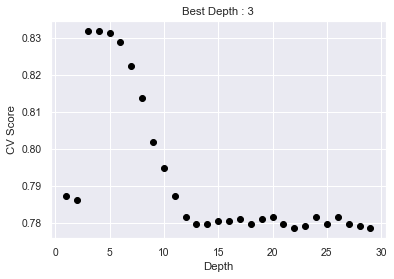

In [26]:
fig, ax = plt.subplots(1)

best_score = 0

for d in range(1,30):
    T = tree.DecisionTreeClassifier(max_depth = d)
    cv_score = cross_val_score(T, trainX, trainy, cv=10).mean()
    ax.scatter(d, cv_score, color = "black")
    if cv_score > best_score:
        best_depth = d
        best_score = cv_score

l = ax.set(title = "Best Depth : " + str(best_depth),
       xlabel = "Depth", 
       ylabel = "CV Score")

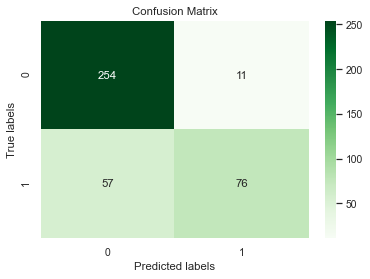

In [27]:
plot_confusion_matrix_(rf, testy, rf.predict(testX))

In [28]:
from sklearn.metrics import classification_report

print(classification_report(testy, rf.predict(testX)))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88       265
           1       0.87      0.57      0.69       133

    accuracy                           0.83       398
   macro avg       0.85      0.76      0.79       398
weighted avg       0.84      0.83      0.82       398



Out of all the customers that the model predicted would get customer insurance, 89% did. Out of all the customers that actually did get customer insurance, the model only correctly predicted this for 50% of those people. The f1 score is not very high.

In [30]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
train_score = []
test_score = []
k_vals = []

for k in range(1, 21):
    k_vals.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(trainX, trainy)
    
    tr_score = knn.score(trainX, trainy)
    train_score.append(tr_score)
    
    te_score = knn.score(testX, testy)
    test_score.append(te_score)

In [32]:
max_test_score = max(test_score)
test_scores_ind = [i for i, v in enumerate(test_score) if v == max_test_score]
print('Max test score {} and k = {}'.format(max_test_score * 100, list(map(lambda x: x + 1, test_scores_ind))))

Max test score 83.16582914572864 and k = [8]


In [33]:
knn = KNeighborsClassifier(8)

knn.fit(trainX, trainy)
knn.score(testX, testy)

0.8316582914572864

In [34]:
print(classification_report(testy, knn.predict(testX)))

              precision    recall  f1-score   support

           0       0.82      0.97      0.88       265
           1       0.89      0.56      0.69       133

    accuracy                           0.83       398
   macro avg       0.85      0.76      0.79       398
weighted avg       0.84      0.83      0.82       398



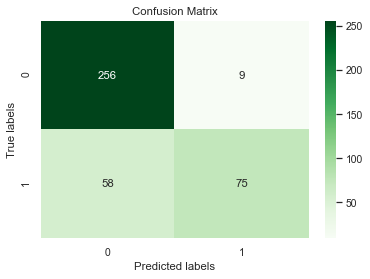

In [35]:
plot_confusion_matrix_(knn, testy, knn.predict(testX))

In [37]:
from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_pred_proba = knn.predict_proba(testX)[:,1]
fpr, tpr, thresholds = roc_curve(testy, y_pred_proba)
roc_auc = auc(fpr, tpr)

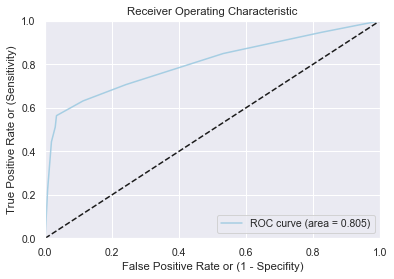

In [38]:
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [39]:

roc_auc_score(testy, y_pred_proba)

0.8048943112498228

# Conclusion

From this, we know that the KNN model is the best for predicting travel insurance churn as it had the highest score of 0.8316582914572864. Airline companies can use this model to predict who will buy travel insurance and then direct their marketing towards that demographic in order to maximize profit.
